In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-white')

SMALL_SIZE = 14
MEDIUM_SIZE = SMALL_SIZE +2
BIGGER_SIZE = MEDIUM_SIZE +2

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1. RNR

## 1.0 Reactor Data

### CLASS
#### Reactor
    - Heavy mass: 72 tons
    - Thermal power: 3 GWth
    - Irradiation time: 7 years that correspond to a burn-up closed to 80 GWd/t
    - Loading factor: 75%

#### FLM
    - 17x17 infinite assembly
    - Neural network prediction of the k$_{inf}$
    - k$_{threshold}$ is 1.034

### Tr_Evol
#### Reactor
    - Thermal_power_(GW) : 3.6
    - Electrical_power_(GW) : 1.44
    - Load_factor : 0.9
    - Core_mass_(tHM) : 45.0
    - Burn_up_(GWd/tHM) : 136
#### FLM
    - Baker \& Ross

### Josette
#### Reactor
    - Thermal_power_(GW) : 3.6
    - Load_factor : 1 ??
    - Core_mass_(tHM) : 71.4
    - Burn_up_(GWd/tHM) : 100
#### FLM
    - Baker \& Ross

## 1.1 Loading Data files and Variable declaration
### XAV / CLASS

In [2]:
def load_class_data(file = 'CLASS_CNRS_RNR/Data.dat'):
    M_CLASS = np.loadtxt(file)
    M_CLASS_FF_BOC = M_CLASS[::4]
    M_CLASS_FF_EOC = M_CLASS[1::4]
    M_CLASS_FLM_BOC = M_CLASS[2::4]
    M_CLASS_FLM_EOC = M_CLASS[3::4]
    
    total_mass = 72    
    
    M_CLASS_FLM_BOC_FPu = M_CLASS_FLM_BOC[:,3]/total_mass
    M_CLASS_FLM_EOC_FPu = M_CLASS_FLM_EOC[:,3]/total_mass
    M_CLASS_FF_BOC_FPu = M_CLASS_FF_BOC[:,3]/total_mass
    M_CLASS_FF_EOC_FPu = M_CLASS_FF_EOC[:,3]/total_mass
    
    return M_CLASS_FLM_BOC_FPu, M_CLASS_FLM_EOC_FPu, M_CLASS_FF_BOC_FPu, M_CLASS_FF_EOC_FPu




### BME

In [3]:
def load_josette_data(file = 'JOSETTE_BME/'):
    M_FF_BOC = np.loadtxt(file + "FF_BOC.txt")
    M_FF_EOC = np.loadtxt(file + "FF_EOC.txt")

    M_FLM_BOC = np.loadtxt(file + "FLM_BOC.txt")
    M_FLM_EOC = np.loadtxt(file + "FLM_EOC.txt")


    total_mass = 7.15E+01
    M_jos_FLM_BOC_FPu = M_FLM_BOC[:,3]/1e6 / total_mass
    M_jos_FLM_EOC_FPu = M_FLM_EOC[:,3]/1e6 / total_mass

    M_jos_FF_BOC_FPu = M_FF_BOC[:,3]/1e6 / total_mass
    M_jos_FF_EOC_FPu = M_FF_EOC[:,3]/1e6 / total_mass

    return M_jos_FLM_BOC_FPu, M_jos_FLM_EOC_FPu, M_jos_FF_BOC_FPu, M_jos_FF_EOC_FPu



### ARIS / TrEvol

In [4]:
def load_TrEvol_data(file = 'TREVOL_CIEMAT/SFR_raw.txt'):
    M_TrEvol = np.loadtxt(file)
    total_mass = 8.7
    M_TrEvol_FLM_BOC_FPu = M_TrEvol[:,23] / total_mass
    M_TrEvol_FLM_EOC_FPu = M_TrEvol[:,33] / total_mass

    M_TrEvol_FF_BOC_FPu = M_TrEvol[:,3] / total_mass
    M_TrEvol_FF_EOC_FPu = M_TrEvol[:,13] / total_mass

    return M_TrEvol_FLM_BOC_FPu, M_TrEvol_FLM_EOC_FPu, M_TrEvol_FF_BOC_FPu, M_TrEvol_FF_EOC_FPu




## Cedric 

In [17]:
def load_dymond_sfr_data(file = 'DYMOND_SFR_V2B'):
        
    M_Dymond_FF_BOC = np.loadtxt(file + '/DYMOND_SFR_V2B_FF_BOC.csv', delimiter=',', skiprows =1)
    M_Dymond_FF_EOC = np.loadtxt(file + '/DYMOND_SFR_V2B_FF_EOC.csv', delimiter=',', skiprows =1)
    M_Dymond_FLM_BOC = np.loadtxt(file + '/DYMOND_SFR_V2B_FLM_BOC.csv', delimiter=',', skiprows =1)
    M_Dymond_FLM_EOC = np.loadtxt(file + '/DYMOND_SFR_V2B_FLM_EOC.csv', delimiter=',', skiprows =1)

    total_mass = 72
    M_Dymond_FLM_BOC_FPu = M_Dymond_FLM_BOC[:1000,3]/total_mass
    M_Dymond_FLM_EOC_FPu = M_Dymond_FLM_EOC[:1000,3]/total_mass

    M_Dymond_FF_BOC_FPu = M_Dymond_FF_BOC[:1000,3]/total_mass
    M_Dymond_FF_EOC_FPu = M_Dymond_FF_EOC[:1000,3]/total_mass

    a1 = M_Dymond_FLM_BOC[:1000,[6,7,8,9,10,11]]
    a2 = M_Dymond_FF_BOC[:1000,[6,7,8,9,10,11]]
    
    M_Dymond_FLM_BOC_PuDOE = a1/np.sum(a1,axis=1,keepdims=True)
    M_Dymond_FF_BOC_PuDOE =  a2/np.sum(a2,axis=1,keepdims=True)
            
    return M_Dymond_FLM_BOC_FPu, M_Dymond_FLM_EOC_FPu, M_Dymond_FF_BOC_FPu, M_Dymond_FF_EOC_FPu, M_Dymond_FLM_BOC_PuDOE, M_Dymond_FF_BOC_PuDOE

### Load Data

In [18]:
M_FLM_BOC_FPu = {}
M_FLM_EOC_FPu = {}
M_FF_BOC_FPu = {}
M_FF_EOC_FPu = {}

M_FLM_BOC_MUPu = {}

M_FLM_BOC_FPu['CLASS'], M_FLM_EOC_FPu['CLASS'], M_FF_BOC_FPu['CLASS'], M_FF_EOC_FPu['CLASS'] = load_class_data()
M_FLM_BOC_FPu['TrEvol'], M_FLM_EOC_FPu['TrEvol'], M_FF_BOC_FPu['TrEvol'], M_FF_EOC_FPu['TrEvol'] = load_TrEvol_data()
M_FLM_BOC_FPu['JOSETTE'], M_FLM_EOC_FPu['JOSETTE'], M_FF_BOC_FPu['JOSETTE'], M_FF_EOC_FPu['JOSETTE'] = load_josette_data()
M_FLM_BOC_FPu['DYMOND'], M_FLM_EOC_FPu['DYMOND'], M_FF_BOC_FPu['DYMOND'], M_FF_EOC_FPu['DYMOND'] = load_dymond_sfr_data()


SFR_MASS = {}
SFR_MASS['CLASS'] = 72
SFR_MASS['TrEvol'] = 8.7
SFR_MASS['JOSETTE'] = 7.14E+01
SFR_MASS['DYMOND'] = 73.8



SFR_CYCLE = {}
SFR_CYCLE['CLASS'] =  80 / (3*0.75) * SFR_MASS['CLASS'] /365.25
SFR_CYCLE['TrEvol'] = 135 / (3.6*0.9) * SFR_MASS['TrEvol'] /365.25
SFR_CYCLE['JOSETTE'] = 100 / (3.6) * SFR_MASS['JOSETTE'] /365.25
SFR_CYCLE['DYMOND'] = 6.60


colors = {}
colors['CLASS'] = "red"
colors['TrEvol'] = "green"
colors['JOSETTE'] = "chartreuse"
colors['DYMOND'] = "violet"




ValueError: too many values to unpack (expected 4)

## Methods

### Estimators

#### Estimator 1
Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

In [7]:
ESTIMATOR_1 = {}
_codes = ['CLASS', 'TrEvol', 'JOSETTE', 'DYMOND']
for code in _codes:
    ESTIMATOR_1[code] = (M_FLM_BOC_FPu[code] - M_FF_BOC_FPu[code] ) /M_FF_BOC_FPu[code]


#### Estimator 2b

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\Delta \frac{\Delta M}{M}(Pu_i) = \frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}$

In [8]:
ESTIMATOR_2b = {}
_codes = ['CLASS', 'TrEvol', 'JOSETTE', 'DYMOND']


for code in _codes:
    _fml = (M_FLM_BOC_FPu[code] -  M_FLM_EOC_FPu[code])/M_FLM_BOC_FPu[code]
    _ff = (M_FF_BOC_FPu[code] -  M_FF_EOC_FPu[code])/M_FF_BOC_FPu[code]
    ESTIMATOR_2b[code] = (_fml - _ff)



#### Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

In [9]:
ESTIMATOR_3 = {}

_codes = ['CLASS', 'TrEvol', 'JOSETTE', 'DYMOND']

for code in _codes:
    _fml = (M_FLM_BOC_FPu[code] -  M_FLM_EOC_FPu[code])* SFR_MASS[code]/SFR_CYCLE[code]
    _ff = (M_FF_BOC_FPu[code] -  M_FF_EOC_FPu[code])* SFR_MASS[code]/SFR_CYCLE[code]
    ESTIMATOR_3[code] = (_fml - _ff)


### Plots

In [10]:
def plot_pu(datas_boc, datas_eoc, labels=[], bins=[], x_label='Mass Fraction', y_label='Density', title_label='SFR MOX FLM - Pu distribution', range=(0,0.20)):

    fig, axs = plt.subplots(len(labels), 1, sharex=True, figsize=(16, 10))
    fig.subplots_adjust(hspace=0.0)

    #plt.title(title_label,fontsize=20)
    axs[0].set_title(title_label)
    plt.xlabel(x_label)

    #plt.ylabel('Number of Occurences')
    for i, label in enumerate(labels):
        bin = 0
        if len(bins) >0:
            bin = bins[i]
        data_boc = datas_boc[label]
        data_eoc = datas_eoc[label]

        axs[i].grid(True)
        axs[i].set_ylabel(y_label)
        axs[i].hist(data_boc,bins=bin,range=range,histtype='stepfilled', alpha=1.0, density=True,lw=2,label='B.O.C.', color="black")
        axs[i].hist(data_eoc,bins=bin,range=range,histtype='stepfilled', alpha=0.4, density=True,lw=2,label='E.O.C.', color="red")
        axs[i].text(0.8, 0.8,label,horizontalalignment='center',verticalalignment='center',transform = axs[i].transAxes, fontsize=15)
        axs[i].legend(loc='upper right',prop={'size': 12})
    plt.show()
    fig.savefig("FIG/SFR_MOX_FLM_Pu.pdf",bbox_inches='tight')

In [11]:
def plot_estimator(datas,labels=[], bins=[], x_label='X', y_label='Y', title_label='Title', range=(0,1)):

    fig, axs = plt.subplots(len(labels), 1, sharex=True, figsize=(16, 10))
    fig.subplots_adjust(hspace=0.0)

    #plt.title(title_label,fontsize=20)
    axs[0].set_title(title_label)
    plt.xlabel(x_label)

    #plt.ylabel('Number of Occurences')
    for i, label in enumerate(labels):
        bin = 0
        if len(bins) >0:
            bin = bins[i]
        data = datas[label]

        axs[i].grid(True)
        axs[i].set_ylabel(y_label)
        axs[i].hist(data,bins=bin,range=range,histtype='step', alpha=1.0, density=True,lw=3,color="black")
        axs[i].text(0.8, 0.8,label,horizontalalignment='center',verticalalignment='center',transform = axs[i].transAxes, fontsize=15)
    plt.show()
    fig.savefig("FIG/"+title_label+".pdf",bbox_inches='tight')

### Print

In [12]:
def print_means_pu(code):
    print("----------------------------------------")
    print("Mean value")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("FLM : ")      
    print("Pu @BOC : ",np.mean(M_FLM_BOC_FPu[code])," - Pu @EOC : ",np.mean(M_FLM_EOC_FPu[code]))
    print ("FF : ")      
    print("Pu @BOC : ",np.mean(M_FF_BOC_FPu[code])," - Pu @EOC : ",np.mean(M_FF_EOC_FPu[code]))
    print("\n")
    

def print_std_pu(code):
    print("----------------------------------------")
    print("Standard Deviation")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("FLM : ")      
    print("Pu @BOC : ",np.std(M_FLM_BOC_FPu[code])," - Pu @EOC : ",np.std(M_FLM_EOC_FPu[code]))
    print ("FF : ")      
    print("Pu @BOC : ",np.std(M_FF_BOC_FPu[code])," - Pu @EOC : ",np.std(M_FF_EOC_FPu[code]))
    print("\n")

In [13]:
def print_means_estimator(code,est):
    print("----------------------------------------")
    print("Mean value")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("estimator : ",np.mean(est[code]))
    print("\n")
    

def print_std_estimator(code,est):
    print("----------------------------------------")
    print("Standard Deviation")
    print("----------------------------------------")
    print("-----",code,"-----")
    print("estimator : ",np.std(est[code]))
    print("\n")

## 1.2 Plotting Pu for FLM @ BOC and EOC

In [14]:
codes = ['CLASS','JOSETTE','TrEvol', 'DYMOND']

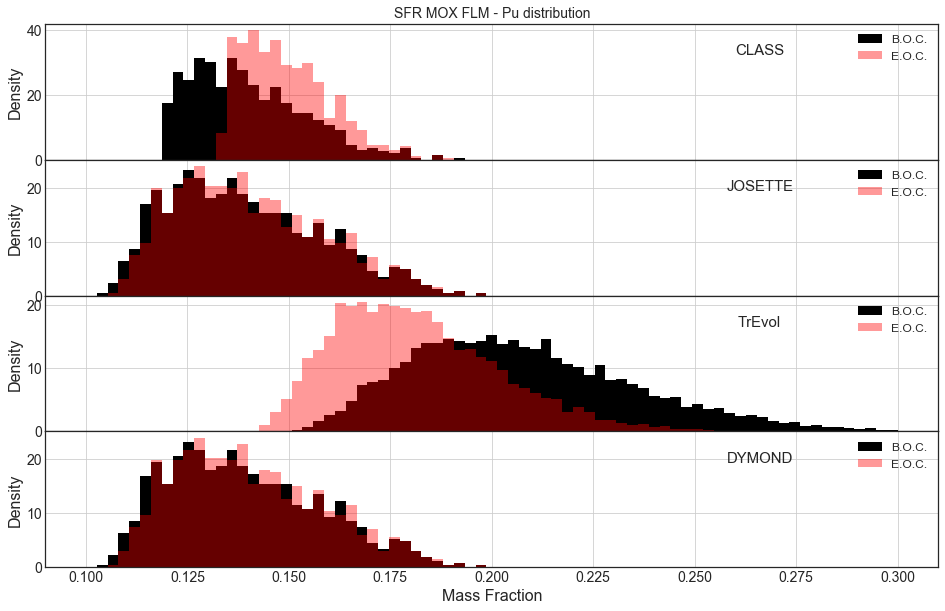

In [15]:
bins = [75, 75, 75, 75]

plot_pu(M_FLM_BOC_FPu, M_FLM_EOC_FPu, bins=bins, labels=codes, range=(0.10,0.30))



## 1.3 Mean value estimators

In [26]:
for code in codes:
    print_means_pu(code)

for code in codes:
    print_std_pu(code)

----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
FLM : 
Pu @BOC :  0.14006475018896447  - Pu @EOC :  0.1495909223356009
FF : 
Pu @BOC :  0.16  - Pu @EOC :  0.1596333767951625


----------------------------------------
Mean value
----------------------------------------
----- JOSETTE -----
FLM : 
Pu @BOC :  0.13906911109090908  - Pu @EOC :  0.14049214254545453
FF : 
Pu @BOC :  0.15030306937062937  - Pu @EOC :  0.15010301062937062


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
FLM : 
Pu @BOC :  0.20791122731979675  - Pu @EOC :  0.18138207861282837
FF : 
Pu @BOC :  0.21435086345618312  - Pu @EOC :  0.1839017064638364


----------------------------------------
Mean value
----------------------------------------
----- DYMOND -----
FLM : 
Pu @BOC :  0.13906911109090908  - Pu @EOC :  0.14049214254545453
FF : 
Pu @BOC :  0.15030306937062937  - Pu @EOC :  0.1501030106

## 1.4 Plotting estimator 1

Estimator 1 is calculated from the Pu fraction @ B.O.C. for each run *i*: 

$F(Pu_i) = \frac{Pu_i^{BOC}}{M_{HN}}$

With $M_{HN}$ the initial heavy mass. The estimator 1 is then calculated as : 

$\delta F(Pu_i) = \frac{F_{FLM}(Pu_i) - F_{FF}(Pu_i)}{F_{FF}(Pu_i)}$

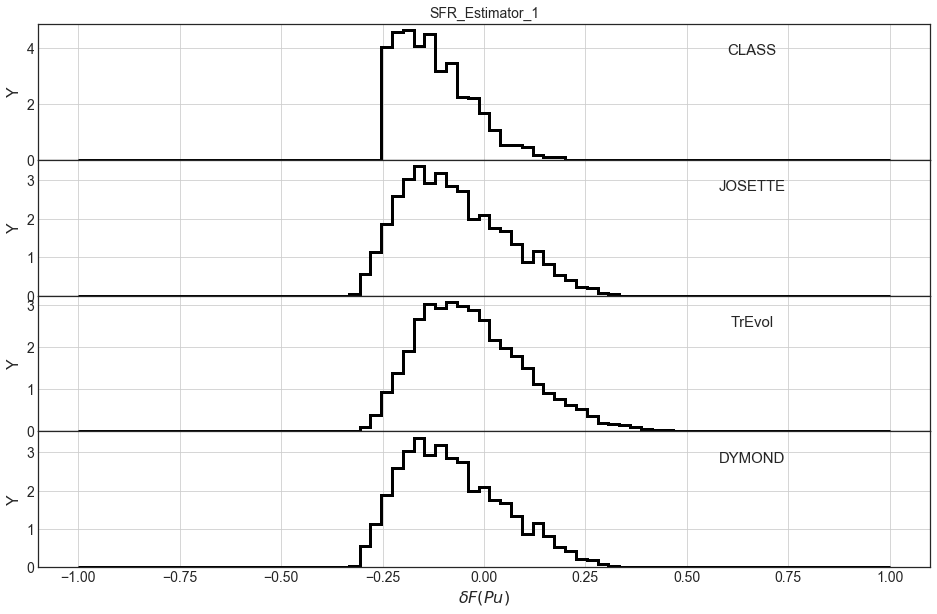

----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  -0.12459531131897206


----------------------------------------
Mean value
----------------------------------------
----- JOSETTE -----
estimator :  -0.0740947209877863


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.029325867213994217


----------------------------------------
Mean value
----------------------------------------
----- DYMOND -----
estimator :  -0.0740947209877863


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.08819791028629895


----------------------------------------
Standard Deviation
----------------------------------------
----- JOSETTE -----
estimator :  0.1258681829734082


----------------------------------------
Standard Deviation
----------------------------------------

In [27]:
bins = [75, 75, 75, 75]
plot_estimator(ESTIMATOR_1, bins=bins, labels=codes, title_label='SFR_Estimator_1', x_label='$\delta F(Pu)$', range=(-1.,1.))


for code in codes:
    print_means_estimator(code,ESTIMATOR_1)

for code in codes:
    print_std_estimator(code,ESTIMATOR_1)    

## 1.5 Plotting Estimator 2b

The second estimator is related to the relative slope of the reactor evolution. Let's define :

$\frac{\Delta M}{M}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{M^{BOC}(Pu_i)}$

The estimateur 2 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{M}(Pu_i) = \frac{\Delta M}{M}(Pu_i)_{FLM} - \frac{\Delta M}{M}(Pu_i)_{FF}$

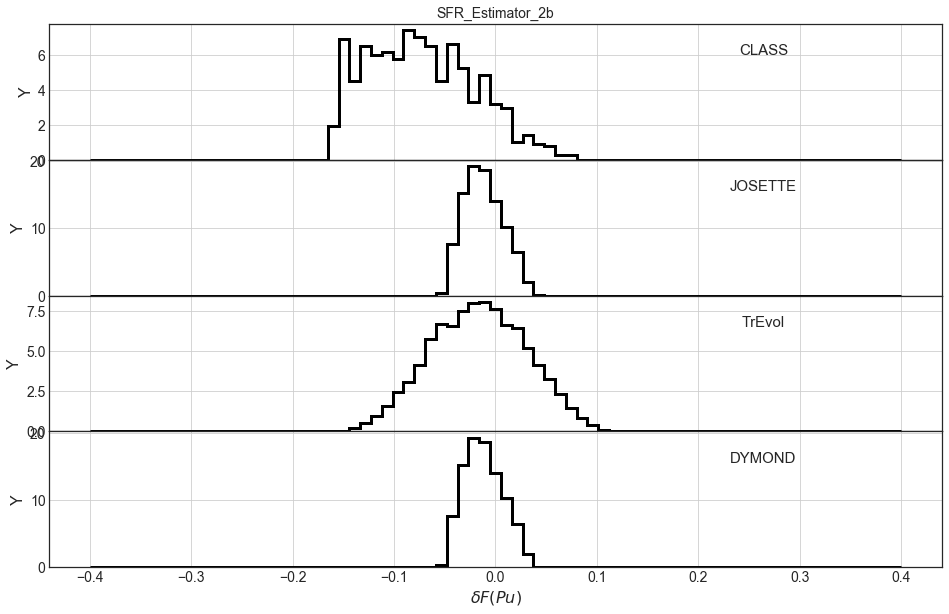

----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  -0.07319481391162887


----------------------------------------
Mean value
----------------------------------------
----- JOSETTE -----
estimator :  -0.01210349884951185


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.016780234826100013


----------------------------------------
Mean value
----------------------------------------
----- DYMOND -----
estimator :  -0.01210349884951185


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.052470837552508476


----------------------------------------
Standard Deviation
----------------------------------------
----- JOSETTE -----
estimator :  0.01871585667431968


----------------------------------------
Standard Deviation
------------------------------------

In [28]:
bins = [75, 75, 75, 75]

plot_estimator(ESTIMATOR_2b, bins=bins, labels=codes, title_label='SFR_Estimator_2b', x_label='$\delta F(Pu)$', range=(-0.4,0.4))


for code in codes:
    print_means_estimator(code,ESTIMATOR_2b)

for code in codes:
    print_std_estimator(code,ESTIMATOR_2b)    

## 1.5 Plotting Estimator 3

The third estimator is related to the absolute slope of the reactor evolution. we define :

$\frac{\Delta M}{\Delta t}(Pu_i) = \frac{M^{BOC}(Pu_i) - M^{EOC}(Pu_i)}{\Delta t}$

The estimateur 3 is then the relative difference of this observable : 

$\delta \frac{\Delta M}{\Delta t}(Pu_i) = \frac{\frac{\Delta M}{\Delta t}(Pu_i)_{FLM} - \frac{\Delta M}{\Delta t}(Pu_i)_{FF}}{\frac{\Delta M}{\Delta t}(Pu_i)_{FF}}$

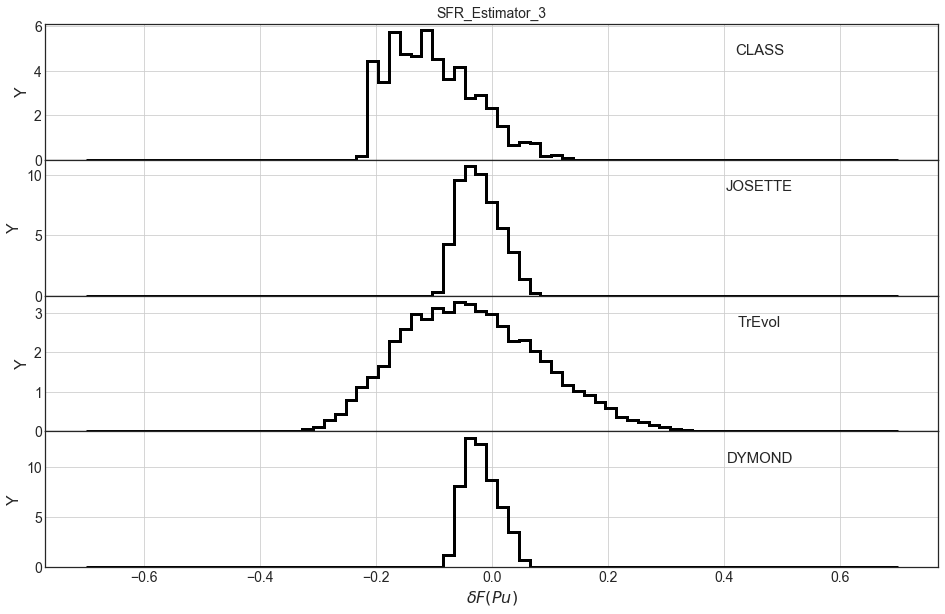

----------------------------------------
Mean value
----------------------------------------
----- CLASS -----
estimator :  -0.10162528599728958


----------------------------------------
Mean value
----------------------------------------
----- JOSETTE -----
estimator :  -0.021342012984629365


----------------------------------------
Mean value
----------------------------------------
----- TrEvol -----
estimator :  -0.0343627926296267


----------------------------------------
Mean value
----------------------------------------
----- DYMOND -----
estimator :  -0.018149099462174186


----------------------------------------
Standard Deviation
----------------------------------------
----- CLASS -----
estimator :  0.07225186546964821


----------------------------------------
Standard Deviation
----------------------------------------
----- JOSETTE -----
estimator :  0.03390579419691841


----------------------------------------
Standard Deviation
-------------------------------------

In [29]:
bins = [75, 75, 75, 75]


plot_estimator(ESTIMATOR_3, bins=bins, labels=codes, title_label='SFR_Estimator_3', x_label='$\delta F(Pu)$', range=(-0.7,0.7))


for code in codes:
    print_means_estimator(code,ESTIMATOR_3)

for code in codes:
    print_std_estimator(code,ESTIMATOR_3)    